In [61]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning/Preprocessing

### Import Restaurant and Orders tables

In [62]:
restaurants = pd.read_csv('Zomato/restaurant.csv').drop(columns=['Unnamed: 0'], axis=1).dropna()
orders = pd.read_csv('Zomato/orders.csv').drop(columns=['Unnamed: 0'], axis=1).dropna()

In [63]:
restaurants.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [64]:
restaurants.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [65]:
restaurants['id'].value_counts()

567335    1
408389    1
574736    1
418194    1
511159    1
         ..
501726    1
395812    1
467993    1
89964     1
447770    1
Name: id, Length: 148255, dtype: int64

In [66]:
orders

,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,2017-10-10,100,41241,INR,49226,567335.0
1,2018-05-08,3,-1,INR,77359,531342.0
2,2018-04-06,1,875,INR,5321,158203.0
3,2018-04-11,1,583,INR,21343,187912.0
4,2018-06-18,6,7176,INR,75378,543530.0
...,...,...,...,...,...,...
148659,2019-03-15,1,1630,INR\r,25901,390478.0
148660,2019-03-15,1,2611,INR\r,97820,103649.0
148661,2019-03-15,7,10458,INR\r,6041,430451.0
148662,2019-03-18,1,713,INR\r,81310,518548.0


In [67]:
orders.rename(columns={'r_id' : 'id'}, inplace=True)

In [68]:
orders.isnull().sum()

order_date      0
sales_qty       0
sales_amount    0
currency        0
user_id         0
id              0
dtype: int64

In [69]:
orders['order_date'].value_counts()

2018-06-22    375
2018-12-21    342
2018-07-20    341
2018-06-11    333
2017-11-03    329
             ... 
2019-05-12      1
2018-09-29      1
2020-02-29      1
2019-03-16      1
2019-10-13      1
Name: order_date, Length: 806, dtype: int64

In [70]:
restaurants.dtypes

id               int64
name            object
city            object
rating          object
rating_count    object
cost            object
cuisine         object
lic_no          object
link            object
address         object
menu            object
dtype: object

In [71]:
orders.dtypes

order_date       object
sales_qty         int64
sales_amount      int64
currency         object
user_id           int64
id              float64
dtype: object

In [72]:
# order_date as datetime
pd.to_datetime(orders['order_date'], format='%Y-%m-%d')

0        2017-10-10
1        2018-05-08
2        2018-04-06
3        2018-04-11
4        2018-06-18
            ...    
148659   2019-03-15
148660   2019-03-15
148661   2019-03-15
148662   2019-03-18
148663   2019-03-18
Name: order_date, Length: 148664, dtype: datetime64[ns]

### Separate cuisines

In [73]:
cuisines = pd.DataFrame(restaurants['cuisine'].str.split(',').tolist(), index=restaurants['id']).stack()

In [74]:
cuisines

id       
567335  0      Beverages
        1         Pizzas
531342  0         Sweets
        1         Bakery
158203  0      Beverages
                ...     
562647  0         Pizzas
559435  0      Fast Food
        1         Snacks
418989  0    Continental
447770  0         Pizzas
Length: 256217, dtype: object

In [75]:
cuisines = cuisines.reset_index([0, 'id'])

In [76]:
cuisines.rename(columns={0 : 'cuisine'}, inplace=True)

In [77]:
cuisines

,id,cuisine
0,567335,Beverages
1,567335,Pizzas
2,531342,Sweets
3,531342,Bakery
4,158203,Beverages
...,...,...
256212,562647,Pizzas
256213,559435,Fast Food
256214,559435,Snacks
256215,418989,Continental


## Merge columns to form final table - id, cost, cuisine, order date

In [78]:
final_df = restaurants[['id', 'name', 'cost']].merge(cuisines, on='id', how='left')
final_df

,id,name,cost,cuisine
0,567335,AB FOODS POINT,₹ 200,Beverages
1,567335,AB FOODS POINT,₹ 200,Pizzas
2,531342,Janta Sweet House,₹ 200,Sweets
3,531342,Janta Sweet House,₹ 200,Bakery
4,158203,theka coffee desi,₹ 100,Beverages
...,...,...,...,...
256212,562647,MAITRI FOODS & BEVERAGES,₹ 300,Pizzas
256213,559435,Cafe Bella Ciao,₹ 300,Fast Food
256214,559435,Cafe Bella Ciao,₹ 300,Snacks
256215,418989,GRILL ZILLA,₹ 250,Continental


In [79]:
final_df.dtypes

id          int64
name       object
cost       object
cuisine    object
dtype: object

In [80]:
final_df = final_df.merge(orders[['id', 'user_id', 'order_date']], on='id', how='left')
final_df

,id,name,cost,cuisine,user_id,order_date
0,567335,AB FOODS POINT,₹ 200,Beverages,49226,2017-10-10
1,567335,AB FOODS POINT,₹ 200,Pizzas,49226,2017-10-10
2,531342,Janta Sweet House,₹ 200,Sweets,77359,2018-05-08
3,531342,Janta Sweet House,₹ 200,Bakery,77359,2018-05-08
4,158203,theka coffee desi,₹ 100,Beverages,5321,2018-04-06
...,...,...,...,...,...,...
256416,562647,MAITRI FOODS & BEVERAGES,₹ 300,Pizzas,3414,2019-01-23
256417,559435,Cafe Bella Ciao,₹ 300,Fast Food,9678,2019-01-23
256418,559435,Cafe Bella Ciao,₹ 300,Snacks,9678,2019-01-23
256419,418989,GRILL ZILLA,₹ 250,Continental,76103,2019-01-24


In [81]:
final_df['id'].value_counts()

139864    4
437616    4
477628    4
129550    4
461724    4
         ..
121861    1
344113    1
514354    1
307293    1
447770    1
Name: id, Length: 148255, dtype: int64

### ? Drop duplicates of id and user_id

In [82]:
#final_df.drop_duplicates(subset=['id', 'user_id'], keep='last', inplace=True)
#final_df

### Grouping cost

In [83]:
final_df['cost'] = final_df['cost'].str.replace('₹', '')
final_df['cost'].value_counts()

 200     66183
 300     51735
 250     34781
 400     20373
 150     20061
         ...  
 1245        1
 287         1
 8           1
 13          1
 64          1
Name: cost, Length: 363, dtype: int64

In [84]:
final_df['cost'] = final_df['cost'].astype(int)
final_df['cost'].describe()

count    256421.000000
mean        291.017939
std         854.954578
min           1.000000
25%         200.000000
50%         250.000000
75%         300.000000
max      300350.000000
Name: cost, dtype: float64

In [85]:
final_df[final_df['cost'] <= 50]['id'].value_counts()

456922    4
458771    2
433263    2
566752    2
488652    2
         ..
494098    1
424472    1
524385    1
304408    1
429544    1
Name: id, Length: 739, dtype: int64

In [86]:
final_df[final_df['cost'] >= 450]['id'].value_counts()

489011    4
134569    4
102042    4
483552    4
573649    2
         ..
340502    1
479842    1
359624    1
420602    1
412949    1
Name: id, Length: 15269, dtype: int64

In [87]:
# Number of restaurants within price range 50-450
148255 - (739 + 15269)

132247

<Axes: xlabel='cost'>

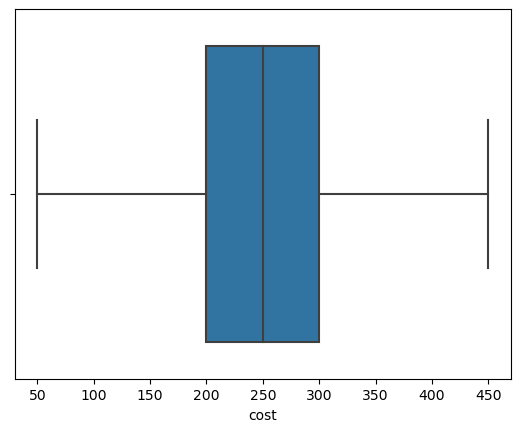

In [88]:
sns.boxplot(x=final_df['cost'], showfliers=False)

In [89]:
# Drop cost outliers - only keep rows where cost is between 50-450
final_df = final_df[(final_df['cost'] >= 50) & (final_df['cost'] <= 450)]

In [90]:
conditions = [
    (final_df['cost'] >= 50) & (final_df['cost'] <= 149),
    (final_df['cost'] >= 150) & (final_df['cost'] <= 249),
    (final_df['cost'] >= 250) & (final_df['cost'] <= 349),
    (final_df['cost'] >= 350)
]
labels = ['₹50-149', '₹150-249', '₹250-349', '₹350-450']
final_df['price_range'] = np.select(conditions, labels)

/var/folders/t6/_4yb5tcj0nx32d6q0zxbv32w0000gn/T/ipykernel_44708/372238113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['price_range'] = np.select(conditions, labels)


In [91]:
final_df

,id,name,cost,cuisine,user_id,order_date,price_range
0,567335,AB FOODS POINT,200,Beverages,49226,2017-10-10,₹150-249
1,567335,AB FOODS POINT,200,Pizzas,49226,2017-10-10,₹150-249
2,531342,Janta Sweet House,200,Sweets,77359,2018-05-08,₹150-249
3,531342,Janta Sweet House,200,Bakery,77359,2018-05-08,₹150-249
4,158203,theka coffee desi,100,Beverages,5321,2018-04-06,₹50-149
...,...,...,...,...,...,...,...
256416,562647,MAITRI FOODS & BEVERAGES,300,Pizzas,3414,2019-01-23,₹250-349
256417,559435,Cafe Bella Ciao,300,Fast Food,9678,2019-01-23,₹250-349
256418,559435,Cafe Bella Ciao,300,Snacks,9678,2019-01-23,₹250-349
256419,418989,GRILL ZILLA,250,Continental,76103,2019-01-24,₹250-349


In [92]:
final_df = final_df[final_df.cuisine != "8:15 To 11:30 Pm"]

# For each segments

In [106]:
df = pd.read_csv('Zomato/segments_new_conjoint.csv').dropna()
df.head()

,id,name,cost,cuisine,user_id,order_date,price_range,customer_segment,k_proto_segment
0,567335,AB FOODS POINT,200,Beverages,49226,2017-10-10,₹150-249,need_attention,2.0
1,567335,AB FOODS POINT,200,Pizzas,49226,2017-10-10,₹150-249,need_attention,2.0
2,531342,Janta Sweet House,200,Sweets,77359,2018-05-08,₹150-249,promising,0.0
3,531342,Janta Sweet House,200,Bakery,77359,2018-05-08,₹150-249,promising,0.0
4,158203,theka coffee desi,100,Beverages,5321,2018-04-06,₹50-149,loyal_customer,0.0


In [107]:
df = df[df.cuisine != "8:15 To 11:30 Pm"]

In [108]:
segments = df['k_proto_segment'].unique()
segments


array([2., 0., 1.])

In [109]:
grouped = df.groupby(['k_proto_segment'])

## Segment 0

In [115]:
df0 = grouped.get_group(0.0)
df0.head()

,id,name,cost,cuisine,user_id,order_date,price_range,customer_segment,k_proto_segment
2,531342,Janta Sweet House,200,Sweets,77359,2018-05-08,₹150-249,promising,0.0
3,531342,Janta Sweet House,200,Bakery,77359,2018-05-08,₹150-249,promising,0.0
4,158203,theka coffee desi,100,Beverages,5321,2018-04-06,₹50-149,loyal_customer,0.0
14,158193,yummy hub,200,Indian,72391,2017-11-28,₹150-249,loyal_customer,0.0
15,407249,CHAWLA SAAB THE JUICE MASTER,300,Juices,91457,2017-11-29,₹250-349,promising,0.0


In [116]:
df0 = df0.groupby(['cuisine', 'price_range']).size().reset_index(name='counts')
df0.head()
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='counts ~ cuisine+price_range'
model_fit=smf.ols(model,data=df0).fit()
conjoint_attributes = ['cuisine','price_range']

level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df0[item])))
    level_name.append(list(np.unique(df0[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

all_pw = pd.DataFrame(
    {'attribute': level_name[0],
     'utility': part_worth[0]
    })
all_pw.head()
all_pw.sort_values(by=['utility'], ascending=False)



cuisine
price_range


,attribute,utility
25,Chettinad,4618.000000
79,North Eastern,4101.500000
49,Ice Cream Cakes,3278.750000
98,Singaporean,2297.500000
15,Bengali,1905.500000
...,...,...
11,Bakery,-260.290060
69,Mangalorean,-260.290060
73,Middle Eastern,-260.290060
60,Keto,-260.290060


[94.8, 5.2]


Text(0, 0.5, 'Importance')

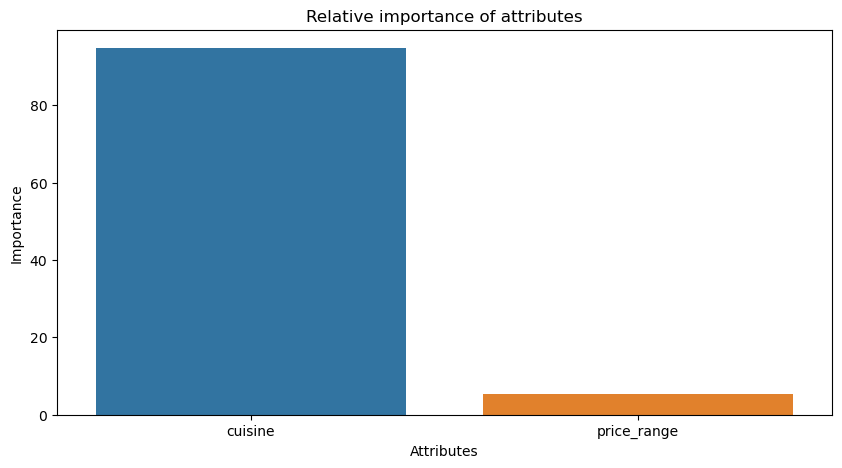

In [117]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

In [118]:
conjoint_attributes = ['price_range']
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df0[item])))
    level_name.append(list(np.unique(df0[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

price_pw = pd.DataFrame(
    {'price_range': level_name[0],
     'utility': part_worth[0] 
    })
price_pw.head()
price_pw.sort_values(by=['utility'], ascending=False)

price_range


,price_range,utility
1,₹250-349,463.000000
2,₹350-450,55.000000
0,₹150-249,-137.167537
3,₹50-149,-380.832463


## Segment 1

In [119]:
df1 = grouped.get_group(1.0)
df1.head()

,id,name,cost,cuisine,user_id,order_date,price_range,customer_segment,k_proto_segment
5,187912,Singh Hut,250,Fast Food,21343,2018-04-11,₹250-349,hibernating,1.0
6,187912,Singh Hut,250,Indian,21343,2018-04-11,₹250-349,hibernating,1.0
9,158204,Sam Uncle,200,Continental,34323,2017-11-20,₹150-249,almost_lost,1.0
10,156588,shere punjab veg,150,North Indian,33246,2017-11-22,₹150-249,need_attention,1.0
11,244866,Shri Balaji Vaishno Dhaba,100,North Indian,87420,2017-11-23,₹50-149,need_attention,1.0


In [120]:
df1 = df1.groupby(['cuisine', 'price_range']).size().reset_index(name='counts')
df1.head()
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='counts ~ cuisine+price_range'
model_fit=smf.ols(model,data=df1).fit()
conjoint_attributes = ['cuisine','price_range']

level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df1[item])))
    level_name.append(list(np.unique(df1[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

all_pw = pd.DataFrame(
    {'attribute': level_name[0],
     'utility': part_worth[0]
    })
all_pw.head()
all_pw.sort_values(by=['utility'], ascending=False)



cuisine
price_range


,attribute,utility
22,Chettinad,1881.373204
66,North Eastern,1655.373204
40,Ice Cream Cakes,1331.623204
84,Singaporean,979.623204
11,Bengali,796.873204
...,...,...
87,South Indian,-63.960948
89,Street Food,-63.960948
54,Lucknowi,-63.960948
12,Beverages,-63.960948


[95.96, 4.04]


Text(0, 0.5, 'Importance')

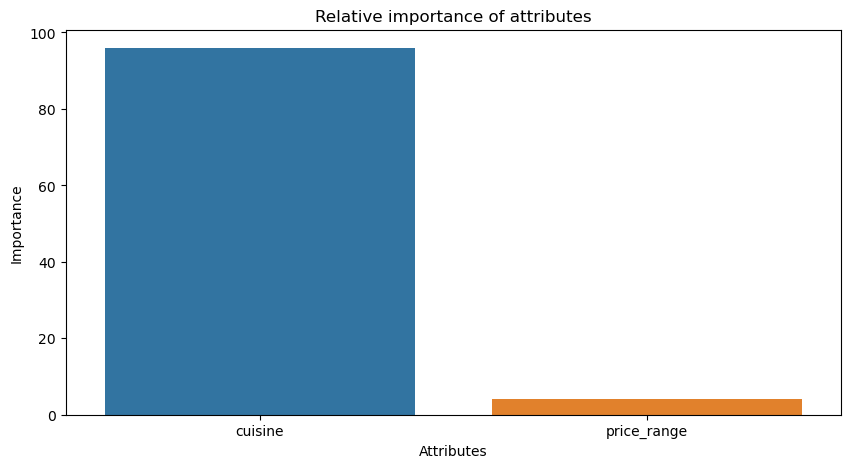

In [121]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')


In [122]:
conjoint_attributes = ['price_range']
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df1[item])))
    level_name.append(list(np.unique(df1[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

price_pw = pd.DataFrame(
    {'price_range': level_name[0],
     'utility': part_worth[0]
    })
price_pw.head()
price_pw.sort_values(by=['utility'], ascending=False)

price_range


,price_range,utility
1,₹250-349,225.873204
0,₹150-249,104.875789
2,₹350-450,68.873204
3,₹50-149,-399.622198


## Segment 2

In [125]:
df2 = grouped.get_group(2.0)
df2.head()

,id,name,cost,cuisine,user_id,order_date,price_range,customer_segment,k_proto_segment
0,567335,AB FOODS POINT,200,Beverages,49226,2017-10-10,₹150-249,need_attention,2.0
1,567335,AB FOODS POINT,200,Pizzas,49226,2017-10-10,₹150-249,need_attention,2.0
7,543530,GRILL MASTERS,250,Italian-American,75378,2018-06-18,₹250-349,promising,2.0
8,543530,GRILL MASTERS,250,Fast Food,75378,2018-06-18,₹250-349,promising,2.0
19,338749,Swastik Dhaba,200,North Indian,27008,2017-11-29,₹150-249,hibernating,2.0


In [126]:
df2 = df2.groupby(['cuisine', 'price_range']).size().reset_index(name='counts')
df2.head()
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='counts ~ cuisine+price_range'
model_fit=smf.ols(model,data=df2).fit()
conjoint_attributes = ['cuisine','price_range']

level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df2[item])))
    level_name.append(list(np.unique(df2[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

all_pw = pd.DataFrame(
    {'attribute': level_name[0],
     'utility': part_worth[0]
    })
all_pw.head()
all_pw.sort_values(by=['utility'], ascending=False)



cuisine
price_range


,attribute,utility
22,Chettinad,1726.599395
66,North Eastern,1546.849395
40,Ice Cream Cakes,1233.599395
83,Singaporean,897.099395
11,Bengali,730.849395
...,...,...
87,Spanish,-60.305121
88,Special Discount from (Hotel Swagath),-60.305121
15,Biryani,-60.305121
31,Goan,-60.305121


[95.86, 4.14]


Text(0, 0.5, 'Importance')

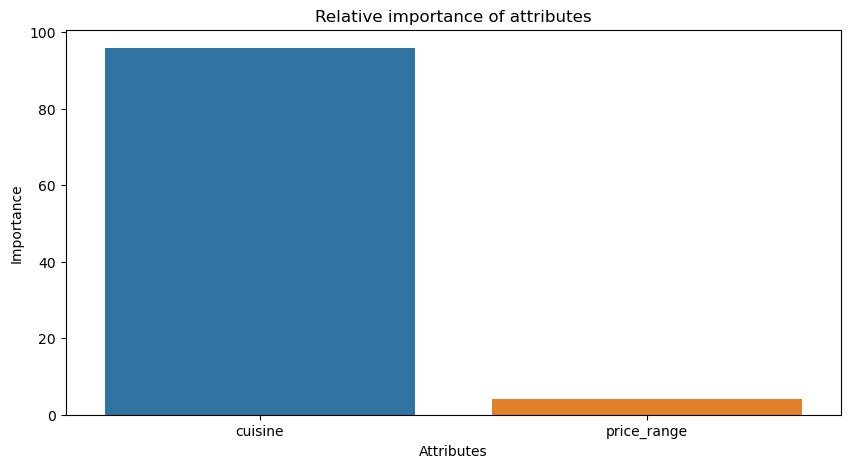

In [127]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

In [128]:
conjoint_attributes = ['price_range']
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df2[item])))
    level_name.append(list(np.unique(df2[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

price_pw = pd.DataFrame(
    {'price_range': level_name[0],
     'utility': part_worth[0]
    })
price_pw.head()
price_pw.sort_values(by=['utility'], ascending=False)

price_range


,price_range,utility
1,₹250-349,216.349395
0,₹150-249,84.055890
2,₹350-450,67.099395
3,₹50-149,-367.504680


# Overall

In [93]:
df_a = final_df.groupby(['cuisine', 'price_range']).size().reset_index(name='counts')
df_a.head()


,cuisine,price_range,counts
0,Afghani,₹150-249,51
1,Afghani,₹250-349,50
2,Afghani,₹350-450,23
3,Afghani,₹50-149,5
4,African,₹150-249,2


In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='counts ~ cuisine+price_range'
model_fit=smf.ols(model,data=df_a).fit()
print(model_fit.summary())
conjoint_attributes = ['cuisine','price_range']


                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     5.917
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.82e-34
Time:                        16:32:58   Log-Likelihood:                -3249.7
No. Observations:                 396   AIC:                             6751.
Df Residuals:                     270   BIC:                             7253.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### Part-worths of each attribute level overall

In [95]:
conjoint_attributes = ['cuisine','price_range']

In [96]:
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df_a[item])))
    level_name.append(list(np.unique(df_a[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("-------------------------------------------------------------")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)

cuisine
price_range
-------------------------------------------------------------
level name:
[['Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Attractive Combos Available', 'Australian', 'Awadhi', 'BEVERAGE', 'Bakery', 'Bakery products', 'Bangladeshi', 'Barbecue', 'Bengali', 'Beverages', 'Bhutanese', 'Bihari', 'Biryani', 'Biryani - Shivaji Military Hotel', 'Bowl Company', 'British', 'Burgers', 'Burmese', 'Cafe', 'Chaat', 'Chettinad', 'Chinese', 'Coastal', 'Code valid on bill over Rs.99', 'Combo', 'Continental', 'Default', 'Desserts', 'Discount offer from Garden Cafe Express Kankurgachi', 'European', 'Fast Food', 'Free Delivery ! Limited Stocks!', 'French', 'German', 'Goan', 'Greek', 'Grill', 'Grocery products', 'Gujarati', 'Haleem', 'Healthy Food', 'Home Food', 'Hyderabadi', 'Ice Cream', 'Ice Cream Cakes', 'Indian', 'Indonesian', 'Italian', 'Italian-American', 'Jain', 'Japanese', 'Juices', 'Kashmiri', 'Kebabs', 'Kerala', 'Keto', 'Khasi', 'Konkan', 'Korean'

In [97]:
all_pw = pd.DataFrame(
    {'attribute': level_name[0],
     'utility': part_worth[0]
    })
all_pw.head()

,attribute,utility
0,Afghani,-222.542246
1,African,805.750000
2,American,89.250000
3,Andhra,545.250000
4,Arabian,153.250000


In [98]:
all_pw.sort_values(by=['utility'], ascending=False)

,attribute,utility
27,Chettinad,8142.250000
82,North Eastern,7220.750000
51,Ice Cream Cakes,5755.250000
101,Singaporean,4080.500000
15,Bengali,3338.000000
...,...,...
67,Lucknowi,-420.297259
62,Keto,-420.297259
72,Mangalorean,-420.297259
34,Desserts,-420.297259


Importance of each attribute

In [99]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[95.21, 4.79]


### Part-worths of each attribute level for Cuisine

In [101]:
conjoint_attributes = ['cuisine']
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df_a[item])))
    level_name.append(list(np.unique(df_a[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

cuisine_pw = pd.DataFrame(
    {'cuisine': level_name[0],
     'utility': part_worth[0]
    })
cuisine_pw.head()

cuisine


,cuisine,utility
0,Afghani,-222.542246
1,African,805.750000
2,American,89.250000
3,Andhra,545.250000
4,Arabian,153.250000


In [102]:
cuisine_pw.sort_values(by=['utility'], ascending=False)

,cuisine,utility
27,Chettinad,8142.250000
82,North Eastern,7220.750000
51,Ice Cream Cakes,5755.250000
101,Singaporean,4080.500000
15,Bengali,3338.000000
...,...,...
67,Lucknowi,-420.297259
62,Keto,-420.297259
72,Mangalorean,-420.297259
34,Desserts,-420.297259


### Part-worths of each attribute level for Price_range

In [104]:
conjoint_attributes = ['price_range']
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df_a[item])))
    level_name.append(list(np.unique(df_a[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

price_pw = pd.DataFrame(
    {'price_range': level_name[0],
     'utility': part_worth[0]
    })
price_pw.head()
price_pw.sort_values(by=['utility'], ascending=False)

price_range


,price_range,utility
1,₹250-349,805.750000
2,₹350-450,89.250000
0,₹150-249,-222.542246
3,₹50-149,-672.457754


In [105]:
price_pw.sort_values(by=['utility'], ascending=False)

,price_range,utility
1,₹250-349,805.750000
2,₹350-450,89.250000
0,₹150-249,-222.542246
3,₹50-149,-672.457754


### Part-worths of each attribute level overall

In [42]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("    Relative importance of attribute ",attribute_importance[i])
    print("    Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("          {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        #print(j)
part_worth_dict

Attribute : cuisine
    Relative importance of attribute  95.21
    Level wise part worths: 
0
0
          Afghani:-222.54224615388154
0
1
          African:805.7500000000414
0
2
          American:89.24999999998838
0
3
          Andhra:545.2500000000255
0
4
          Arabian:153.25000000000085
0
5
          Asian:-16.750000000007482
0
6
          Assamese:-420.2972590645496
0
7
          Attractive Combos Available:-409.4980923015345
0
8
          Australian:-218.5422461538745
0
9
          Awadhi:-420.2972590645529
0
10
          BEVERAGE:1907.5000000000232
0
11
          Bakery:-420.2972590645245
0
12
          Bakery products:-220.20891282054515
0
13
          Bangladeshi:72.25000000000193
0
14
          Barbecue:161.25000000000264
0
15
          Bengali:3337.9999999999254
0
16
          Beverages:-224.54224615387858
0
17
          Bhutanese:-8.000000000021846
0
18
          Bihari:3196.750000000021
0
19
          Biryani:-420.2972590645303
0
20
          Biryani - Shivaji Military

{'Afghani': -222.54224615388154,
 'African': 805.7500000000414,
 'American': 89.24999999998838,
 'Andhra': 545.2500000000255,
 'Arabian': 153.25000000000085,
 'Asian': -16.750000000007482,
 'Assamese': -420.2972590645496,
 'Attractive Combos Available': -409.4980923015345,
 'Australian': -218.5422461538745,
 'Awadhi': -420.2972590645529,
 'BEVERAGE': 1907.5000000000232,
 'Bakery': -420.2972590645245,
 'Bakery products': -220.20891282054515,
 'Bangladeshi': 72.25000000000193,
 'Barbecue': 161.25000000000264,
 'Bengali': 3337.9999999999254,
 'Beverages': -224.54224615387858,
 'Bhutanese': -8.000000000021846,
 'Bihari': 3196.750000000021,
 'Biryani': -420.2972590645303,
 'Biryani - Shivaji Military Hotel': -420.297259064541,
 'Bowl Company': -22.500000000014033,
 'British': 159.9999999999696,
 'Burgers': -18.499999999982453,
 'Burmese': 35.499999999989576,
 'Cafe': 393.99999999999375,
 'Chaat': 22.999999999972417,
 'Chettinad': 8142.24999999993,
 'Chinese': -215.20891282054225,
 'Coastal'

Text(0, 0.5, 'Importance')

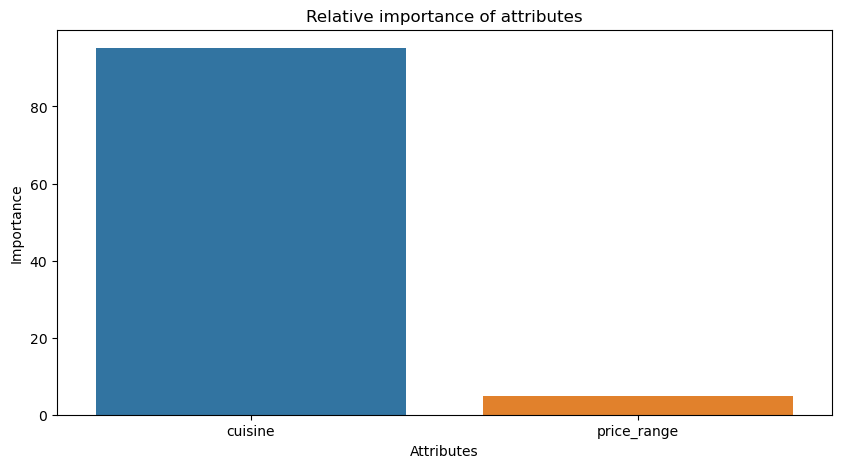

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')